## attribute information (for never gonna give you up)

artist_mbid: db92a151-1ac2-438b-bc43-b82e149ddd50
the musicbrainz.org ID for this artists is db9...


artist_mbtags: shape = (4,)
this artist received 4 tags on musicbrainz.org


artist_mbtags_count: shape = (4,)
raw tag count of the 4 tags this artist received on musicbrainz.org


artist_name: Rick Astley
artist name


artist_playmeid: 1338
the ID of that artist on the service playme.com


artist_terms: shape = (12,)
this artist has 12 terms (tags) from The Echo Nest


artist_terms_freq: shape = (12,)
frequency of the 12 terms from The Echo Nest (number between 0 and 1)


artist_terms_weight: shape = (12,)
weight of the 12 terms from The Echo Nest (number between 0 and 1)


audio_md5: bf53f8113508a466cd2d3fda18b06368
hash code of the audio used for the analysis by The Echo Nest


bars_confidence: shape = (99,)
confidence value (between 0 and 1) associated with each bar by The Echo Nest


bars_start: shape = (99,)
start time of each bar according to The Echo Nest, this song has 99 bars


beats_confidence: shape = (397,)
confidence value (between 0 and 1) associated with each beat by The Echo Nest


beats_start: shape = (397,)
start time of each beat according to The Echo Nest, this song has 397 beats


danceability: 0.0
danceability measure of this song according to The Echo Nest (between 0 and 1, 0 => not analyzed)


duration: 211.69587
duration of the track in seconds


end_of_fade_in: 0.139
time of the end of the fade in, at the beginning of the song, according to The Echo Nest


energy: 0.0
energy measure (not in the signal processing sense) according to The Echo Nest (between 0 and 1, 0 => not analyzed)


key: 1
estimation of the key the song is in by The Echo Nest


key_confidence: 0.324
confidence of the key estimation


loudness: -7.75
general loudness of the track


mode: 1
estimation of the mode the song is in by The Echo Nest


mode_confidence: 0.434
confidence of the mode estimation


release: Big Tunes - Back 2 The 80s
album name from which the track was taken, some songs / tracks can come from many albums, we give 
only one


release_7digitalid: 786795
the ID of the release (album) on the service 7digital.com


sections_confidence: shape = (10,)
confidence value (between 0 and 1) associated with each section by The Echo Nest


sections_start: shape = (10,)
start time of each section according to The Echo Nest, this song has 10 sections


segments_confidence: shape = (935,)
confidence value (between 0 and 1) associated with each segment by The Echo Nest


segments_loudness_max: shape = (935,)
max loudness during each segment


segments_loudness_max_time: shape = (935,)
time of the max loudness during each segment


segments_loudness_start: shape = (935,)
loudness at the beginning of each segment


segments_pitches: shape = (935, 12)
chroma features for each segment (normalized so max is 1.)


segments_start: shape = (935,)
start time of each segment (~ musical event, or onset) according to The Echo Nest, this song has 935 segments


segments_timbre: shape = (935, 12)
MFCC-like features for each segment

similar_artists: shape = (100,)
a list of 100 artists (their Echo Nest ID) similar to Rick Astley according to The Echo Nest

song_hotttnesss: 0.864248830588
according to The Echo Nest, when downloaded (in December 2010), this song had a 'hotttnesss' of 0.8 (on a scale of 0 and 1)


song_id: SOCWJDB12A58A776AF
The Echo Nest song ID, note that a song can be associated with many tracks (with very slight audio differences)


start_of_fade_out: 198.536
start time of the fade out, in seconds, at the end of the song, according to The Echo Nest


tatums_confidence: shape = (794,)
confidence value (between 0 and 1) associated with each tatum by The Echo Nest


tatums_start: shape = (794,)
start time of each tatum according to The Echo Nest, this song has 794 tatums


tempo: 113.359
tempo in BPM according to The Echo Nest


time_signature: 4
time signature of the song according to The Echo Nest, i.e. usual number of beats per bar


time_signature_confidence: 0.634
confidence of the time signature estimation


title: Never Gonna Give You Up
song title


track_7digitalid: 8707738
the ID of this song on the service 7digital.com


track_id: TRAXLZU12903D05F94
The Echo Nest ID of this particular track on which the analysis was done


year: 1987
year when this song was released, according to musicbrainz.org

In [1]:
# import necessary modules and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# useful functions - deleted most of them because i did not use them

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

#####

# full training set
train = pd.read_csv('C:/Users/jason/Desktop/data_science/songsA.csv')
# training with only latitude/longitude coordinates
train_locations = pd.read_csv('C:/Users/jason/Desktop/data_science/songs_locations.csv')
# training with only artist_locations not blank
artist_locations = pd.read_csv('C:/Users/jason/Desktop/data_science/artist_locations.csv')
# testing set
test = pd.read_csv('C:/Users/jason/Desktop/data_science/songs_test.csv')

In [2]:
# drop latitude and longitude columns 

artist_locations = artist_locations.drop(['artist_latitude', 'artist_longitude'], axis=1)
print(artist_locations.info())

# fill nan's in song_hotttnesss with mean

artist_locations['song_hotttnesss'] = artist_locations['song_hotttnesss'].fillna(np.mean(artist_locations['song_hotttnesss']))
#artist_locations.info()

df_numbers = artist_locations.drop(['analysis_sample_rate', 'genre', 'track_id', 'title', 'artist_location',
                           'release', 'artist_name', 'artist_id', 'artist_mbid', 'audio_md5'], axis=1)
#df_numbers.info()

df_chars = artist_locations[['analysis_sample_rate', 'genre', 'song_id', 'track_id', 'title',
                           'release', 'artist_name', 'artist_location', 'artist_mbid', 'audio_md5',
                            'artist_id']]
df_chars = df_chars.set_index('song_id')
print(len(df_chars.columns))

data = df_numbers
data = df_numbers.set_index('song_id')
print(len(data.columns))

# fill in missing years with median
data['year'] = data['year'].replace(0, np.median(data['year']))

# the maximum year in the dataset is 2010 (so old!) but there are 1202 songs that were
# released after 2000. it may be interesting to run a test based on old music
# and recommend "new" music.
# might use as the test set, if needed
len(data[data['year'] >= 2000]) # => 1202

cols = data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 30 columns):
analysis_sample_rate         4217 non-null int64
audio_md5                    4217 non-null object
duration                     4217 non-null float64
end_of_fade_in               4217 non-null float64
key                          4217 non-null int64
key_confidence               4217 non-null float64
loudness                     4217 non-null float64
mode                         4217 non-null int64
mode_confidence              4217 non-null float64
start_of_fade_out            4217 non-null float64
tempo                        4217 non-null float64
time_signature               4217 non-null int64
time_signature_confidence    4217 non-null float64
track_id                     4217 non-null object
artist_7digitalid            4217 non-null int64
artist_familiarity           4217 non-null float64
artist_hotttnesss            4217 non-null float64
artist_id                    4217 non-

In [3]:
from sklearn.cluster import KMeans

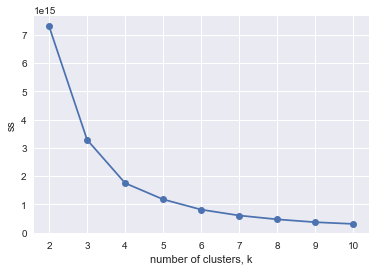

In [4]:
#select k

ks = range(2,11)
ss = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(data[cols])
    ss.append(model.inertia_)

plt.plot(ks, ss, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('ss')
plt.xticks(ks)
plt.show()

In [5]:
# selecting k = 4

k = 4

model = KMeans(n_clusters=k)
model.fit_predict(data[cols])

labels = list(model.labels_)
clusters = list(range(0,k))

song_clusters = []

for n in clusters:
    temp = []
    for i in range(len(data)):
        if labels[i] == n:
            temp.append([data.index[i]])
            
    song_clusters.append((n, temp))
    
#song_clusters

In [6]:
type(song_clusters[0][1][0][0])

str

In [7]:
# order of clusters to add as a column to data

cluster_labels = []

for i in range(len(data)):
    for j in range(len(song_clusters)):
        for k in range(len(song_clusters[j][1])):
            if data.index[i] == song_clusters[j][1][k][0]:
                cluster_labels.append(j)
                


In [8]:
#cluster_labels

In [9]:
data.insert(len(data.columns), 'cluster', cluster_labels)

In [10]:

cluster_0 = data[data['cluster'] == 0].drop('cluster', axis=1)
cluster_1 = data[data['cluster'] == 1].drop('cluster', axis=1)
cluster_2 = data[data['cluster'] == 2].drop('cluster', axis=1)
cluster_3 = data[data['cluster'] == 3].drop('cluster', axis=1)


In [11]:
cluster_data = data.join(df_chars)
len(cluster_data.columns)

30

In [12]:
cluster_data.to_csv('C:/Users/jason/Desktop/data_science/cluster_data.csv')

In [13]:
cluster_0.describe()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_playmeid,release_7digitalid,song_hotttnesss,track_7digitalid,year
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02,992.000000
mean,234.785116,0.628264,5.255040,0.442910,-10.831051,0.709677,0.474112,226.345079,122.679029,3.478831,0.486841,99771.007056,0.593752,0.412663,26808.057460,526890.209677,0.361674,5.866913e+06,1987.208669
std,109.421733,1.672587,3.527959,0.278173,5.587623,0.454140,0.198020,107.867911,34.614731,1.251258,0.372952,128284.960596,0.138302,0.116603,45057.381282,64504.050788,0.185378,6.685234e+05,13.518601
min,11.597910,0.000000,0.000000,0.000000,-37.398000,0.000000,0.000000,11.598000,0.000000,0.000000,0.000000,-1.000000,0.233440,0.000000,-1.000000,129857.000000,0.000000,4.551205e+06,1927.000000
25%,171.251790,0.000000,2.000000,0.213000,-13.852750,0.000000,0.356750,163.998000,97.830250,3.000000,0.039750,8194.750000,0.499092,0.347148,-1.000000,473726.000000,0.304170,5.278842e+06,1977.000000
50%,217.756280,0.183000,5.000000,0.461000,-9.673500,1.000000,0.488000,209.888000,119.952000,4.000000,0.509000,34818.000000,0.585683,0.397481,3883.500000,533565.000000,0.382721,5.900979e+06,1977.000000
75%,269.994650,0.372500,8.000000,0.649250,-6.624250,1.000000,0.605250,260.865750,143.381250,4.000000,0.838250,167936.750000,0.687024,0.464541,33549.000000,583863.250000,0.405250,6.489096e+06,2001.000000
max,1598.197100,28.172000,11.000000,1.000000,-1.723000,1.000000,1.000000,1588.216000,243.195000,7.000000,1.000000,740906.000000,0.947328,1.082503,213914.000000,622216.000000,0.931346,6.908021e+06,2010.000000


In [14]:
cluster_1.describe()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_playmeid,release_7digitalid,song_hotttnesss,track_7digitalid,year
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1.146000e+03,1146.000000
mean,234.592063,0.752718,5.386562,0.457562,-10.760446,0.709424,0.485858,225.516247,123.818082,3.541885,0.496390,27635.922339,0.651968,0.453641,24070.774869,73769.410995,0.403717,7.755763e+05,1987.905759
std,101.462662,1.810636,3.544570,0.278129,5.815565,0.454226,0.190800,99.641373,34.490618,1.279496,0.371018,49222.727405,0.143696,0.128680,37994.056248,54658.038570,0.195263,5.616213e+05,13.041145
min,10.344040,0.000000,0.000000,0.000000,-51.643000,0.000000,0.000000,10.344000,0.000000,1.000000,0.000000,-1.000000,0.023504,0.000000,-1.000000,63.000000,0.000000,8.450000e+02,1927.000000
25%,175.947303,0.000000,2.000000,0.241250,-13.577750,0.000000,0.365000,169.410500,97.999750,3.000000,0.074250,4159.000000,0.549290,0.371761,-1.000000,25411.750000,0.366109,2.762888e+05,1977.000000
50%,222.680365,0.218000,6.000000,0.479000,-9.748000,1.000000,0.498000,212.874500,120.408000,4.000000,0.524500,12521.000000,0.649125,0.435469,5398.000000,60413.000000,0.382721,6.347900e+05,1983.000000
75%,273.841180,0.421000,9.000000,0.674750,-6.615750,1.000000,0.611000,262.721750,143.080750,4.000000,0.846750,28789.000000,0.767020,0.536307,39073.000000,123103.500000,0.525497,1.271805e+06,2001.000000
max,1143.039550,32.972000,11.000000,1.000000,-1.622000,1.000000,1.000000,1138.109000,253.357000,7.000000,1.000000,623985.000000,1.000000,1.082503,241356.000000,354896.000000,0.997758,1.977434e+06,2009.000000


In [15]:
cluster_2.describe()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_playmeid,release_7digitalid,song_hotttnesss,track_7digitalid,year
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000
mean,235.601645,0.643629,5.308123,0.453875,-9.753164,0.704482,0.482618,227.986996,122.870824,3.551821,0.496204,122714.404762,0.597839,0.412271,30336.254902,715816.390756,0.364951,7.955805e+06,1985.960784
std,121.497092,1.567322,3.685043,0.276191,4.713380,0.456595,0.192537,120.010843,32.880267,1.261459,0.376405,159583.659089,0.136728,0.122911,50059.890729,66706.941968,0.184303,6.376281e+05,13.933669
min,20.793020,0.000000,0.000000,0.000000,-31.982000,0.000000,0.000000,20.793000,34.335000,1.000000,0.000000,23.000000,0.000000,0.000000,-1.000000,43200.000000,0.000000,6.915094e+06,1930.000000
25%,165.864035,0.000000,2.000000,0.233250,-12.529750,0.000000,0.366250,159.802500,97.381500,3.000000,0.067250,10320.500000,0.501246,0.344542,-1.000000,665472.750000,0.323349,7.381215e+06,1977.000000
50%,210.873015,0.160000,5.000000,0.480500,-8.858000,1.000000,0.496500,203.737500,121.500000,4.000000,0.525000,36253.000000,0.596382,0.395943,3131.500000,715128.000000,0.382721,7.935056e+06,1977.000000
75%,274.833830,0.377750,9.000000,0.650000,-6.030750,1.000000,0.605750,266.076000,143.098000,4.000000,0.835000,187657.000000,0.689255,0.461452,41324.250000,769017.250000,0.399714,8.525148e+06,2001.000000
max,1686.752200,14.681000,11.000000,1.000000,-1.672000,1.000000,1.000000,1686.752000,230.992000,7.000000,1.000000,740906.000000,0.947328,1.005942,242965.000000,823059.000000,1.000000,9.084575e+06,2010.000000


In [16]:
cluster_3.describe()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_playmeid,release_7digitalid,song_hotttnesss,track_7digitalid,year
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1.365000e+03,1365.000000
mean,237.580847,0.814010,5.293040,0.472309,-10.413579,0.698901,0.491768,229.014282,121.075092,3.547985,0.512922,60370.735531,0.633717,0.443800,20573.155311,285721.789744,0.389684,3.224439e+06,1988.338462
std,111.229491,1.786957,3.470317,0.270413,5.272435,0.458904,0.188717,109.464196,34.385764,1.265406,0.374358,88350.441915,0.143986,0.128506,37249.989978,63998.041690,0.191535,6.551726e+05,13.112686
min,1.044440,0.000000,0.000000,0.000000,-36.835000,0.000000,0.000000,1.044000,0.000000,1.000000,0.000000,4.000000,0.040130,0.000000,-1.000000,1112.000000,0.000000,2.002226e+06,1927.000000
25%,177.188120,0.000000,2.000000,0.262000,-13.149000,0.000000,0.367000,168.414000,95.044000,3.000000,0.107000,4839.000000,0.534464,0.360916,-1.000000,239965.000000,0.345802,2.699748e+06,1977.000000
50%,223.633830,0.200000,5.000000,0.496000,-9.424000,1.000000,0.501000,213.188000,117.936000,4.000000,0.558000,21255.000000,0.624200,0.423826,4235.000000,285737.000000,0.382721,3.221887e+06,1987.000000
75%,276.427300,0.463000,8.000000,0.676000,-6.518000,1.000000,0.621000,267.860000,141.165000,4.000000,0.876000,86044.000000,0.747684,0.518372,20077.000000,324747.000000,0.484563,3.679240e+06,2001.000000
max,1519.281180,30.575000,11.000000,1.000000,-1.031000,1.000000,1.000000,1506.412000,241.892000,7.000000,1.000000,800901.000000,1.000000,1.082503,213914.000000,407996.000000,0.927133,4.539389e+06,2010.000000


In [26]:
data = cluster_3

cols = data.columns
#list(cols)

most_corr = []

for i in cols:
    second_highest = []
    for j in cols:
        r = pearson_r(data[i], data[j])
        print('the correlation of '+i+ ' and '+j+' is ', r)
        second_highest.append((r, j))
        second_highest = sorted(second_highest)
        
    print()    
    print('most correlated variable with '+i+' is ', second_highest[-2])
    print()
    most_corr.append((i, second_highest[-2][1]))
###
#most_corr



the correlation of duration and duration is  1.0
the correlation of duration and end_of_fade_in is  0.10258030403922917
the correlation of duration and key is  0.02604228352563426
the correlation of duration and key_confidence is  -0.011616352409030455
the correlation of duration and loudness is  0.09189040916506722
the correlation of duration and mode is  -0.0774720580622014
the correlation of duration and mode_confidence is  -0.034521280445732806
the correlation of duration and start_of_fade_out is  0.9985755655496424
the correlation of duration and tempo is  -0.027201760045959505
the correlation of duration and time_signature is  0.11399232642290452
the correlation of duration and time_signature_confidence is  0.10667167041964029
the correlation of duration and artist_7digitalid is  0.04322194750613051
the correlation of duration and artist_familiarity is  0.020167841443487457
the correlation of duration and artist_hotttnesss is  0.04063215222349409
the correlation of duration and a

[('duration', 'start_of_fade_out'),
 ('end_of_fade_in', 'duration'),
 ('key', 'loudness'),
 ('key_confidence', 'mode_confidence'),
 ('loudness', 'artist_familiarity'),
 ('mode', 'key_confidence'),
 ('mode_confidence', 'key_confidence'),
 ('start_of_fade_out', 'duration'),
 ('tempo', 'loudness'),
 ('time_signature', 'time_signature_confidence'),
 ('time_signature_confidence', 'time_signature'),
 ('artist_7digitalid', 'artist_playmeid'),
 ('artist_familiarity', 'artist_hotttnesss'),
 ('artist_hotttnesss', 'artist_familiarity'),
 ('artist_playmeid', 'artist_7digitalid'),
 ('release_7digitalid', 'track_7digitalid'),
 ('song_hotttnesss', 'artist_familiarity'),
 ('track_7digitalid', 'release_7digitalid'),
 ('year', 'artist_familiarity')]